<h1>05. How to customize your plots </h1>
Fine-tuning and customization using matplotlib. 


<p class="lead"> 
Table of Contents: 

- <a href="#Combine-matplotlib,-pandas,-and-seaborn-plots-in-the-same-figure">Combine Matplotlib, Pandas, and Seaborn plots in the same figure</a>
- <a href="#Add-annotations">Add annotations</a>    
- <a href="#Change-style">Change style</a>
- <a href="#Sharing-your-plots">Share your plots</a>

    
</p>





In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('mpg.csv')

<div>
<h2 class="breadcrumb">Combine Matplotlib, Pandas, and Seaborn plots in the same figure</h2><p>
</div>


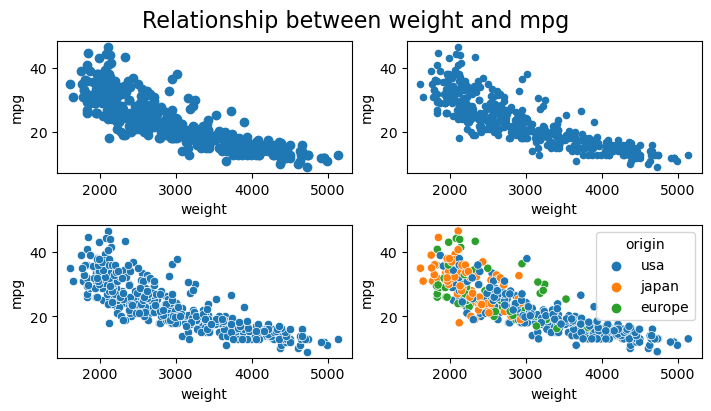

In [2]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 4), constrained_layout=True)

# matplotlib plot
ax1.scatter(df['weight'], df['mpg']);  
ax1.set_xlabel('weight'); 
ax1.set_ylabel('mpg');

# pandas plot
df.plot('weight', 'mpg', kind='scatter', ax=ax2);

# sns plot
sns.scatterplot(data=df, x='weight', y="mpg", ax=ax3);
sns.scatterplot(data=df, x='weight', y="mpg", hue='origin', ax=ax4);

# Add figure title
fig.suptitle('Relationship between weight and mpg', fontsize=16);

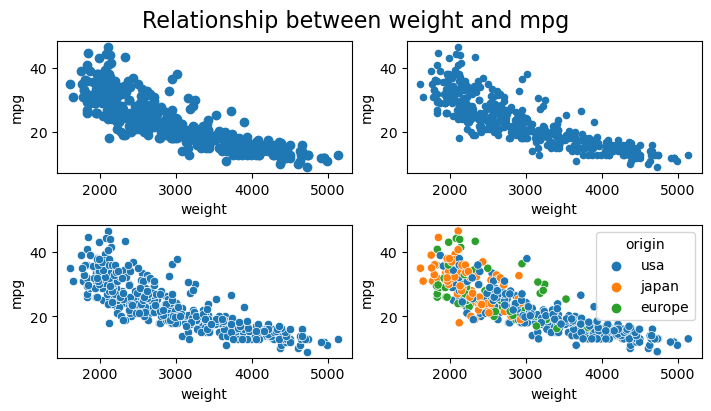

In [3]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(7, 4), constrained_layout=True)

# matplotlib plot
ax1.scatter(df['weight'], df['mpg'])
ax1.set_xlabel('weight')
ax1.set_ylabel('mpg')

# pandas plot
df.plot('weight', 'mpg', kind='scatter', ax=ax2)

# sns plot
sns.scatterplot(data=df, x='weight', y="mpg", ax=ax3)
sns.scatterplot(data=df, x='weight', y="mpg", hue='origin', ax=ax4)

# Add figure title
fig.suptitle('Relationship between weight and mpg', fontsize=16)

plt.show()

<div class="alert alert-info">
<h4>Exercise</h4>

- Load the Penguins dataset from 'assets/penguins.csv' and call it `dfe`.  
- Use Matplotlib, Pandas, and Seaborn to plot the distribution of body mass and arrange three plots in one figure. 
    
<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
dfe = pd.read_csv('assets/penguins.csv')


fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(7, 4), constrained_layout=True)
#matplotlib
ax1.hist(dfe['body_mass_g']);
ax1.set_ylabel('Frequency');
#pandas
dfe['body_mass_g'].plot(kind='hist', ax=ax2);
#seaborn
sns.histplot(data=dfe, x='body_mass_g', kde=True, ax=ax3);
ax3.set_ylabel('Frequency');
#Add figure title
fig.suptitle('Distribution of body mass', fontsize=16);
```

</details>
</div>

<div class="alert alert-success">
<h4>Tips</h4>

- Use `subplot_mosaic` to  achieve more complex layouts, with Axes objects spanning columns or rows.



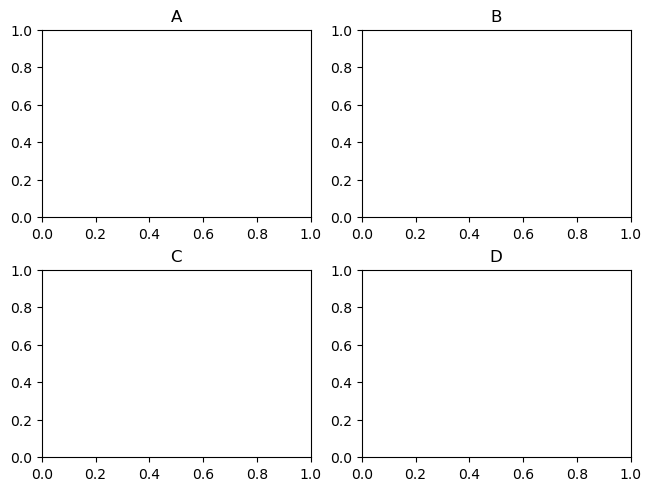

In [4]:
fig, axs = plt.subplot_mosaic("""
    AB
    CD
    """, layout='constrained')
    
axs['A'].set_title('A')
axs['B'].set_title('B')
axs['C'].set_title('C');
axs['D'].set_title('D');

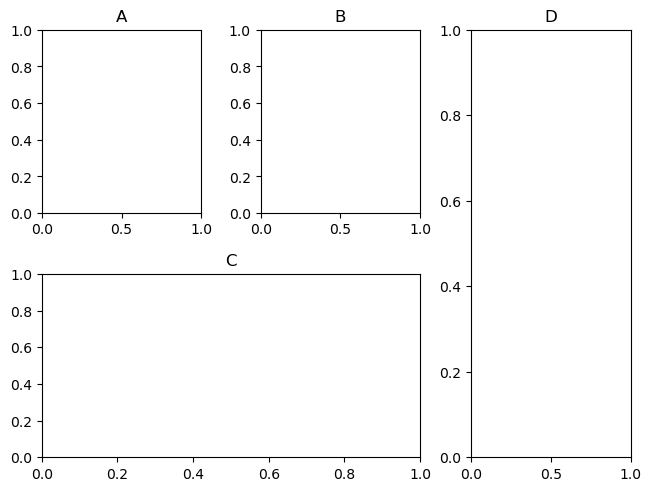

In [5]:
fig, axs = plt.subplot_mosaic("""
    ABD
    CCD
    """, layout='constrained')
    
axs['A'].set_title('A')
axs['B'].set_title('B')
axs['C'].set_title('C');
axs['D'].set_title('D');

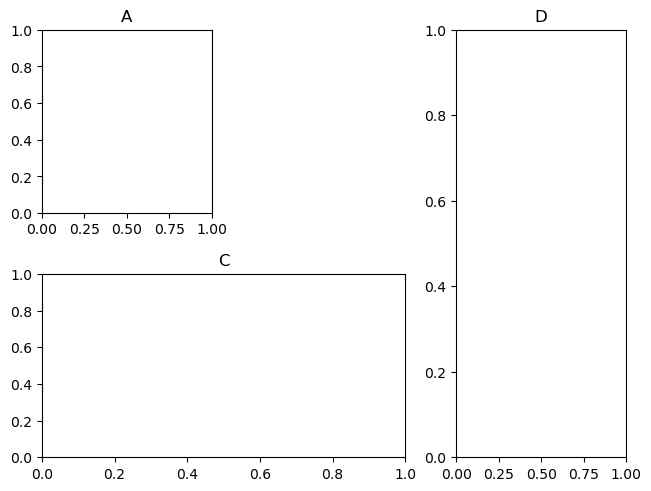

In [6]:
fig, axs = plt.subplot_mosaic("""
    A.D
    CCD
    """, layout='constrained')
    
axs['A'].set_title('A')
axs['C'].set_title('C');
axs['D'].set_title('D');

<div>
<h2 class="breadcrumb">Add annotations</h2><p>
</div>


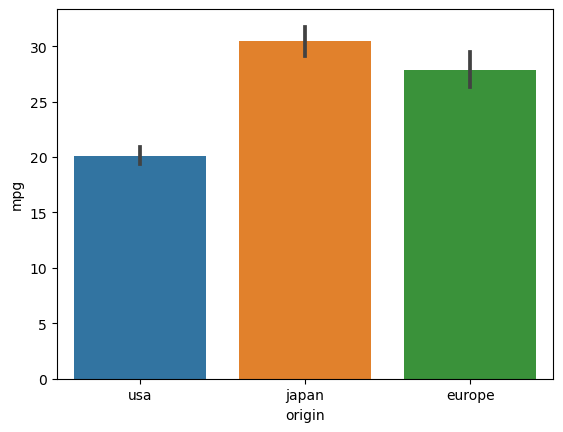

In [7]:
sns.barplot(data=df, x='origin', y='mpg');

In [8]:
df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

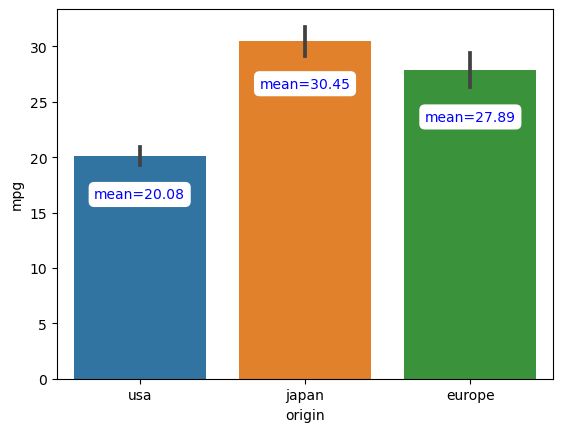

In [9]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='origin', y='mpg', ax=ax);

ax.annotate(
    text='mean=20.08', 
    xy=(0, 16), 
    horizontalalignment='center',
    verticalalignment='bottom',
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2)
);

ax.annotate(
    text='mean=30.45',
    xy=(1, 26), 
    horizontalalignment='center',
    verticalalignment='bottom',
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2)
);

ax.annotate(
    text='mean=27.89',
    xy=(2, 23), 
    horizontalalignment='center',
    verticalalignment='bottom',
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2)
);

<div class="alert alert-info">
<h4>Exercise</h4>

- Read the [Matplotlib annotation documentation](https://matplotlib.org/stable/tutorials/text/annotations.html)
- Try adding arrows in the above plots

<details><summary><i><u>(Solution)</u><i></summary><br>
    
```python
fig, ax = plt.subplots()
sns.barplot(data=df, x='origin', y='mpg', ax=ax);
ax.annotate(
    'mean=20.08', 
    horizontalalignment='center',
    verticalalignment='bottom',
    xy=(0, 19), 
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2),
    arrowprops={'facecolor': 'r'},
    xytext=(0,10)
    
);
ax.annotate(
    'mean=30.45',
    horizontalalignment='center',
    verticalalignment='bottom',
    xy=(1, 29), 
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2),
    arrowprops={'facecolor': 'r'},
    xytext=(1,16)
    
);
ax.annotate(
    'mean=27.89',
    horizontalalignment='center',
    verticalalignment='bottom',
    xy=(2, 26), 
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2),
    arrowprops={'facecolor': 'r'},
    xytext=(2,16)
);
```
</details>
</div>

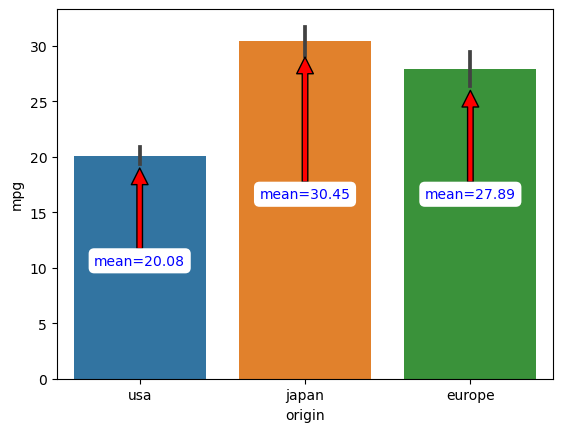

In [11]:
fig, ax = plt.subplots()
sns.barplot(data=df, x='origin', y='mpg', ax=ax);
ax.annotate(
    'mean=20.08', 
    horizontalalignment='center',
    verticalalignment='bottom',
    xy=(0, 19), 
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2),
    arrowprops={'facecolor': 'r'},
    xytext=(0,10)
    
);
ax.annotate(
    'mean=30.45',
    horizontalalignment='center',
    verticalalignment='bottom',
    xy=(1, 29), 
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2),
    arrowprops={'facecolor': 'r'},
    xytext=(1,16)
    
);
ax.annotate(
    'mean=27.89',
    horizontalalignment='center',
    verticalalignment='bottom',
    xy=(2, 26), 
    color='b',
    bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2),
    arrowprops={'facecolor': 'r'},
    xytext=(2,16)
);

<div class="alert alert-success">
<h4>Tips</h4>

- A better way is to write a for loop to add values programmatically:



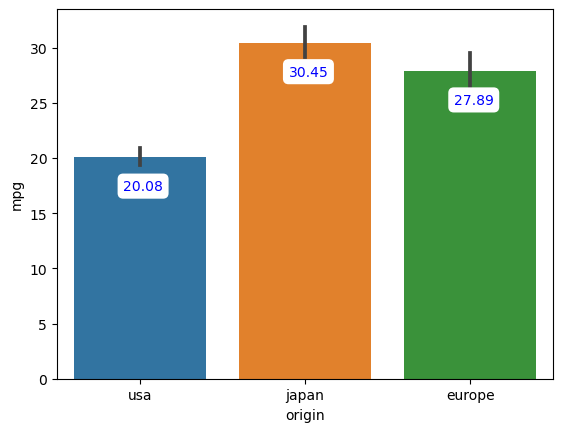

In [10]:
fig, ax = plt.subplots()

sns.barplot(data=df, x='origin', y='mpg', ax=ax);

for p in ax.patches:
    ax.annotate(
        text=round(p.get_height(),2), 
        xy=(p.get_x()+0.3, p.get_height()-3),
        color='b',
        bbox=dict(boxstyle="round,pad=0.3", fc="w", ec="w", lw=2)
    );

<div>
<h2 class="breadcrumb">Change style</h2><p>
</div>


There are a number of [pre-defined styles](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html) provided by Matplotlib. To list all available styles, use:



In [12]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


To use a specific style, add:

In [19]:
plt.style.use('ggplot')

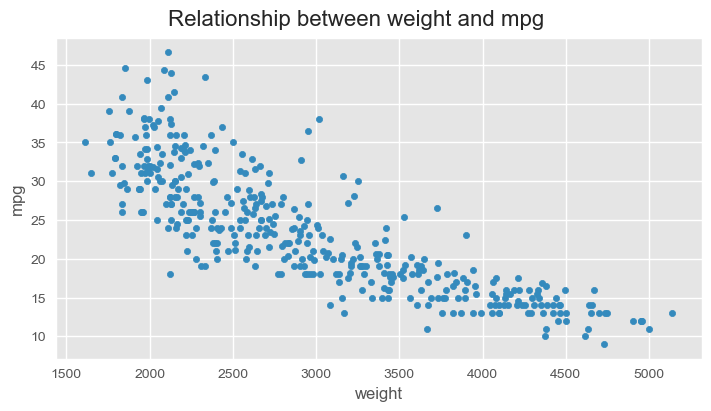

In [20]:
fig,ax = plt.subplots(figsize=(7, 4), constrained_layout=True)

df.plot('weight', 'mpg', kind='scatter', ax=ax);

fig.suptitle('Relationship between weight and mpg', fontsize=16);

<div>
<h2 class="breadcrumb">Share your plots</h2><p>
</div>


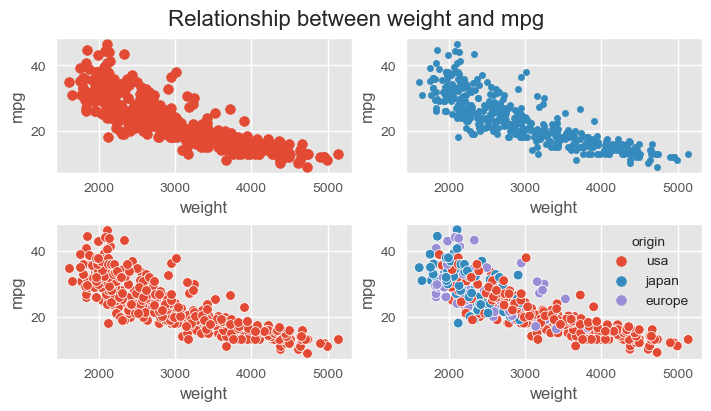

In [21]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 4), constrained_layout=True)

# matplotlib plot
ax1.scatter(df['weight'], df['mpg']);  
ax1.set_xlabel('weight'); 
ax1.set_ylabel('mpg');

# pandas plot
df.plot('weight', 'mpg', kind='scatter', ax=ax2);

# sns plot
sns.scatterplot(data=df, x='weight', y="mpg", ax=ax3);
sns.scatterplot(data=df, x='weight', y="mpg", hue='origin', ax=ax4);

# Add figure title
fig.suptitle('Relationship between weight and mpg', fontsize=16);

We can use the `.savefig` function to save a figure to a local file. Here is the list of supported file formats:

In [22]:
plt.gcf().canvas.get_supported_filetypes()

{'eps': 'Encapsulated Postscript',
 'jpg': 'Joint Photographic Experts Group',
 'jpeg': 'Joint Photographic Experts Group',
 'pdf': 'Portable Document Format',
 'pgf': 'PGF code for LaTeX',
 'png': 'Portable Network Graphics',
 'ps': 'Postscript',
 'raw': 'Raw RGBA bitmap',
 'rgba': 'Raw RGBA bitmap',
 'svg': 'Scalable Vector Graphics',
 'svgz': 'Scalable Vector Graphics',
 'tif': 'Tagged Image File Format',
 'tiff': 'Tagged Image File Format'}

<Figure size 800x550 with 0 Axes>

In [23]:
# save figure to a .png file
fig.savefig("weight_mpg.png")

In [24]:
# save figure to a .pdf file
fig.savefig("weight_mpg.pdf")